In [2]:
# 发球局的分数
# 接发球局得分数
# 跑动距离
# 发球失误数

# match_id
# p1_points_won
# p2_points_won

In [3]:
# 熵权法
# 数据预处理，同时做一致化和归一化
# 发球局得分: if serve==self and point_victor==self: self.point_FaQiu+=1
# 接发球局得分: if serve!=self and point_victor==self: self.point_JieQiu+=1
# 跑动距离: self.d+=distance_run (记得归一化)
# 发球失误数: if serve==self: self.point_Error+=(double_fualt+serve_no) () 
point={'0':0,'1':1, '2':2 ,'3':3, '4':4, '5':5, '6':6, '7':7, '8':8,'9':9, '10':10, '11':11, '12':12, '15':1, '30':2, '40':3, 'AD':4}
## 数据预处理
import csv
filename='Wimbledon_featured_matches.csv'
l=[]
with open(filename,'r',encoding="utf-8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # 计算变量值
        point_Faqiu1 = (1 if int(row['server'])==1 and int(row['point_victor'])==1 else 0) + int(row['p1_ace']) + int(row['p1_winner'])
        point_Faqiu2 = (1 if int(row['server'])==2 and int(row['point_victor'])==2 else 0) + int(row['p2_ace']) + int(row['p2_winner'])
        # point_Faqiu1 = (1 if int(row['server'])==1 and int(row['point_victor'])==1 else 0)
        # point_Faqiu2 = (1 if int(row['server'])==2 and int(row['point_victor'])==2 else 0)

        point_Jieqiu1 = 1 if int(row['server'])==2 and int(row['point_victor'])==1 else 0
        point_Jieqiu2 = 1 if int(row['server'])==1 and int(row['point_victor'])==2 else 0
        # d1 = float(row['p1_distance_run'])
        # d2 = float(row['p2_distance_run'])
        point_Error1 = int(row['p1_double_fault']) + (1 if int(row['server'])==1 and int(row['serve_no'])==2 else 0)
        point_Error2 = int(row['p2_double_fault']) + (1 if int(row['server'])==2 and int(row['serve_no'])==2 else 0)
        point_delta1 = int(point[row['p1_score']]-point[row['p2_score']])
        point_delta2 = int(point[row['p2_score']]-point[row['p1_score']])
        # 保存到列表
        l.append([int(row['match_id'][-4:]), point_Faqiu1, point_Faqiu2, 
                  point_Jieqiu1, point_Jieqiu2, 
                #   d1, d2, 
                  # 0.0,0.0,
                  point_Error1, point_Error2, 
                  point_delta1, point_delta2,
                  int(row['point_victor'])])
print(l)

[[1301, 0, 0, 0, 1, 1, 0, 0, 0, 2], [1301, 1, 0, 0, 0, 0, 0, -1, 1, 1], [1301, 0, 0, 0, 1, 0, 0, 0, 0, 2], [1301, 2, 0, 0, 0, 0, 0, -1, 1, 1], [1301, 3, 0, 0, 0, 0, 0, 0, 0, 1], [1301, 0, 0, 0, 1, 1, 0, 1, -1, 2], [1301, 3, 0, 0, 0, 0, 0, 0, 0, 1], [1301, 0, 1, 0, 1, 1, 0, 1, -1, 2], [1301, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1301, 1, 0, 0, 0, 0, 0, 1, -1, 1], [1301, 0, 3, 0, 0, 0, 0, 0, 0, 2], [1301, 0, 0, 1, 0, 0, 0, -1, 1, 1], [1301, 0, 0, 1, 0, 0, 0, 0, 0, 1], [1301, 0, 2, 0, 0, 0, 0, 1, -1, 2], [1301, 0, 1, 0, 0, 0, 0, 0, 0, 2], [1301, 0, 0, 1, 0, 0, 1, -1, 1, 1], [1301, 0, 1, 0, 0, 0, 0, 0, 0, 2], [1301, 0, 2, 0, 0, 0, 0, -1, 1, 2], [1301, 3, 0, 0, 0, 0, 0, 0, 0, 1], [1301, 1, 0, 0, 0, 0, 0, 1, -1, 1], [1301, 0, 0, 0, 1, 0, 0, 2, -2, 2], [1301, 1, 0, 0, 0, 0, 0, 1, -1, 1], [1301, 1, 0, 0, 0, 1, 0, 2, -2, 1], [1301, 0, 1, 0, 0, 0, 1, 0, 0, 2], [1301, 0, 1, 0, 0, 0, 0, -1, 1, 2], [1301, 0, 3, 0, 0, 0, 0, -2, 2, 2], [1301, 0, 2, 0, 0, 0, 0, -3, 3, 2], [1301, 2, 0, 0, 0, 0, 0, 0, 0, 1], [13

In [4]:
## 数据标准化
## x= [i-min(x) / max(x)-min(x) for i in x]
import numpy as np
# 比赛号集合
matchid = list(set(np.array([i[0] for i in l])))
matchid.sort()
# print(matchid)
last_id = matchid[0]
index1 = []
index2 = []
index3 = []
index4 = []
index5 = []
for item in l:
    if item[0] == last_id:
        if index1 == []:
            index1.append(item[1])
            index1.append(item[2])
            index2.append(item[3])
            index2.append(item[4])
            index3.append(item[5])
            index3.append(item[6])
            index4.append(item[7])
            index4.append(item[8])
            # index5.append(item[9])
            # index5.append(item[10])
        else:
            # 累积
            index1.append(index1[-2]+item[1])
            index1.append(index1[-2]+item[2])
            index2.append(index2[-2]+item[3])
            index2.append(index2[-2]+item[4])
            index3.append(index3[-2]+item[5])
            index3.append(index3[-2]+item[6])
            index4.append(index4[-2]+item[7])
            index4.append(index4[-2]+item[8])
            # index5.append(index5[-2]+item[9])
            # index5.append(index5[-2]+item[10])
    else:
        last_id = item[0]
        index1.append(item[1])
        index1.append(item[2])
        index2.append(item[3])
        index2.append(item[4])
        index3.append(item[5])
        index3.append(item[6])
        index4.append(item[7])
        index4.append(item[8])
        # index5.append(item[9])
        # index5.append(item[10])

# print(index1)
# print(index2)
# print(index3)
# print(index4)
# 数据归一化
index1 = np.array(index1)
index2 = np.array(index2)
index3 = np.array(index3)
index4 = np.array(index4)
# index5 = np.array(index5)
indexNew1 = [(i-min(index1))/(max(index1)-min(index1)) for i in index1]
indexNew2 = [(i-min(index2))/(max(index2)-min(index2)) for i in index2]
indexNew4 = [(i-min(index4))/(max(index4)-min(index4)) for i in index4]
# 距离 发球失误是负指标，所以需要取max-x
# indexNew3 = [(max(index3)-i)/(max(index3)-min(index3)) for i in index3]
# indexNew3 = [0.0 for i in index3]
indexNew3 = [(max(index3)-i)/(max(index3)-min(index3)) for i in index3]
print(indexNew1)
print(indexNew2)
print(indexNew3)
print(indexNew4)
# print(indexNew5)


[0.0, 0.0, 0.004484304932735426, 0.0, 0.004484304932735426, 0.0, 0.013452914798206279, 0.0, 0.026905829596412557, 0.0, 0.026905829596412557, 0.0, 0.04035874439461883, 0.0, 0.04035874439461883, 0.004484304932735426, 0.04484304932735426, 0.004484304932735426, 0.04932735426008968, 0.004484304932735426, 0.04932735426008968, 0.017937219730941704, 0.04932735426008968, 0.017937219730941704, 0.04932735426008968, 0.017937219730941704, 0.04932735426008968, 0.026905829596412557, 0.04932735426008968, 0.03139013452914798, 0.04932735426008968, 0.03139013452914798, 0.04932735426008968, 0.03587443946188341, 0.04932735426008968, 0.04484304932735426, 0.06278026905829596, 0.04484304932735426, 0.06726457399103139, 0.04484304932735426, 0.06726457399103139, 0.04484304932735426, 0.07174887892376682, 0.04484304932735426, 0.07623318385650224, 0.04484304932735426, 0.07623318385650224, 0.04932735426008968, 0.07623318385650224, 0.053811659192825115, 0.07623318385650224, 0.06726457399103139, 0.07623318385650224, 0

In [5]:
num = len(indexNew1)
print(num)
print(len(matchid))
print(matchid)
print(type(matchid[0]))


14568
31
[1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1501, 1502, 1503, 1504, 1601, 1602, 1701]
<class 'numpy.int32'>


In [6]:
## 熵权法
import pandas as pd
#下面求指标比重
sigma_xij = [sum(indexNew1), sum(indexNew2), sum(indexNew3), sum(indexNew4)]
indexP1 = [i/sigma_xij[0] if i/sigma_xij[0]!=0.0 else 1e-6 for i in indexNew1]
indexP2 = [i/sigma_xij[1] if i/sigma_xij[1]!=0.0 else 1e-6 for i in indexNew2]
indexP3 = [i/sigma_xij[2] if i/sigma_xij[2]!=0.0 else 1e-6 for i in indexNew3]
# indexP3 = [1e-6 for i in indexNew3]
indexP4 = [i/sigma_xij[3] if i/sigma_xij[3]!=0.0 else 1e-6 for i in indexNew4]
# indexP5 = [i/sigma_xij[4] if i/sigma_xij[4]!=0.0 else 1e-6 for i in indexNew5]
#求熵值Hi
#先算K值
k=1/ np.log(num)           #考察年度为九年
# print(k)
indexHj1  = (-k) * sum([pij*np.log(pij) for pij in indexP1])
indexHj2  = (-k) * sum([pij*np.log(pij) for pij in indexP2])
indexHj3  = (-k) * sum([pij*np.log(pij) for pij in indexP3])
indexHj4  = (-k) * sum([pij*np.log(pij) for pij in indexP4])
# indexHj5  = (-k) * sum([pij*np.log(pij) for pij in indexP5])
allHj =[indexHj1, indexHj2, indexHj3, indexHj4]
all = np.mat([indexNew1, indexNew2, indexNew3, indexNew4]).T

print(allHj)

[0.9753416159565151, 0.9736053423179826, 0.9944882100052044, 0.9955517726295076]


C:\Users\Anne\AppData\Local\Temp\ipykernel_10936\1259120364.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
indexHjs = pd.Series(allHj, index=['发球局的分数','接发球局得分数','发球失误数', '局内分差'], name='指标的熵值')
#下面求差异系数
index_bianyi=pd.Series([1-i for i in allHj], index=['发球局的分数','接发球局得分数','发球失误数','局内分差'], name='差异系数')
print(index_bianyi)
print()
print(indexHjs)

发球局的分数     0.024658
接发球局得分数    0.026395
发球失误数      0.005512
局内分差       0.004448
Name: 差异系数, dtype: float64

发球局的分数     0.975342
接发球局得分数    0.973605
发球失误数      0.994488
局内分差       0.995552
Name: 指标的熵值, dtype: float64


In [8]:
#下面计算指标权重
IndexWeight = index_bianyi / sum(index_bianyi)
IndexWeight.name = '指标权重'
print(IndexWeight)

发球局的分数     0.404149
接发球局得分数    0.432607
发球失误数      0.090338
局内分差       0.072906
Name: 指标权重, dtype: float64


In [9]:
def impurse(datalist):
    #下面计算综合得分
    # datalist[0]*=1
    # datalist[1]*=1
    # datalist[2]*=(-0.01)
    # datalist[3]*=(-0.1)
    # datalist[4]*=2
    score = np.dot(datalist, IndexWeight)
    return score
print(impurse([2,3,4,1]))

def guiyihua(data):
    i1=data[0]
    i2=data[1]
    i3=data[2]
    i4=data[3]
    # i5=data[4]
    i1 = [(i-min(i1))/(max(i1)-min(i1)) for i in i1]
    i2 = [(i-min(i2))/(max(i2)-min(i2)) for i in i2]
    # i5 = [(i-min(i5))/(max(i5)-min(i5)) for i in i5]
    i3 = [(max(i3)-i)/(max(i3)-min(i3)) for i in i3]
    # i4 = [(max(i4)-i)/(max(i4)-min(i4)) for i in i4]
    i4 = [(i-min(i4))/(max(i4)-min(i4)) for i in i4]

    return np.array([i1,i2,i3,i4]).T

2.540376286526713


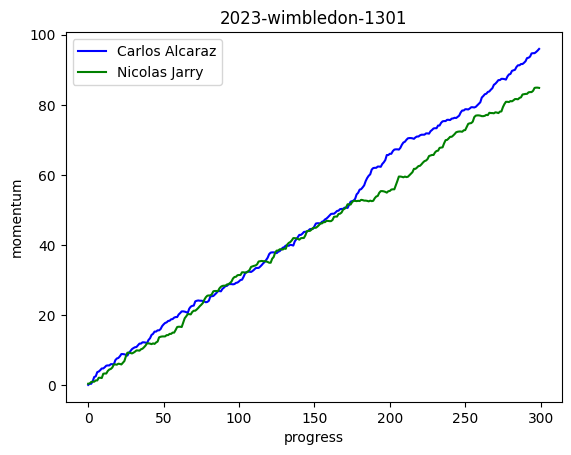

In [10]:
# 数据可视化
import matplotlib.pyplot as plt
import numpy as np
p1=[]
p2=[]
match=matchid[0]
# match=np.int32('1701')
for item in l:
    if item[0] == match:
        if p1 == []:
            p1.append([item[1],item[3],item[5],item[7]])
            p2.append([item[2],item[4],item[6],item[8]])
            # p1.append([item[1],item[3],0.0,item[7],item[9]])
            # p2.append([item[2],item[4],0.0,item[8],item[10]])
        else:
            # 累积
            p1.append([p1[-1][0]+item[1],p1[-1][1]+item[3],p1[-1][2]+item[5],p1[-1][3]+item[7]])
            p2.append([p2[-1][0]+item[2],p2[-1][1]+item[4],p2[-1][2]+item[6],p2[-1][3]+item[8]])
            # p1.append([p1[-1][0]+item[1],p1[-1][1]+item[3],p1[-1][2]+item[5],p1[-1][3]+item[7], p1[-1][4]+item[9]])
            # p2.append([p2[-1][0]+item[2],p2[-1][1]+item[4],p2[-1][2]+item[6],p2[-1][3]+item[8], p2[-1][4]+item[10]])
# 按列归一化
# p1 = guiyihua(np.array(p1).T)
# p2 = guiyihua(np.array(p2).T)
p1 = np.array(p1)
p2 = np.array(p2)
# print(p1)
# print(p2)
p1_impurse = [impurse(i) for i in p1]
p2_impurse = [impurse(i) for i in p2]
x = np.arange(0, len(p1_impurse))
plt.plot(x,p1_impurse,color = 'b',label=u"Carlos Alcaraz")#s-:方形
plt.plot(x,p2_impurse,color = 'g',label=u"Nicolas Jarry")#o-:圆形
plt.xlabel("progress")#横坐标名字
plt.ylabel("momentum")#纵坐标名字
plt.title("2023-wimbledon-"+str(match))

plt.legend(loc = "best")#图例
plt.show()


In [11]:
data = []

for match in matchid:
    result = 0
    p1=[]
    p2=[]
    for k,item in enumerate(l):
        if item[0] == match:
            if p1 == []:
                p1.append([item[1],item[3],item[5],item[7]])
                p2.append([item[2],item[4],item[6],item[8]])
            else:
                # 累积
                p1.append([p1[-1][0]+item[1],p1[-1][1]+item[3],p1[-1][2]+item[5],p1[-1][3]+item[7]])
                p2.append([p2[-1][0]+item[2],p2[-1][1]+item[4],p2[-1][2]+item[6],p2[-1][3]+item[8]])
            if k == len(l)-1:
                if item[9]==1:
                    result = 1
                else:
                    result = 2
                # print(item[9])
                # print(match,'res:',result)
            elif l[k+1][0] != match:
                if item[9]==1:
                    result = 1
                else:
                    result = 2
                # print(item[9])
                # print(match,'res:',result)
                break
    # 按列归一化
    # p1 = guiyihua(np.array(p1).T)
    # p2 = guiyihua(np.array(p2).T)
    data.append([impurse(p1[-1]),impurse(p2[-1]),result,match])
print(data)


[[95.94894598196221, 84.83133594367682, 1, 1301], [58.50127721756228, 68.36008549167049, 2, 1302], [28.34974337072407, 58.87212316821278, 2, 1303], [98.98548594737188, 105.13970413805343, 2, 1304], [75.821687446797, 70.80711384827433, 1, 1305], [114.90447915183732, 83.2119806737397, 1, 1306], [94.41622997018472, 59.198945260583784, 1, 1307], [53.607174584736995, 58.10542520372587, 2, 1308], [73.77389844327217, 62.44299142946451, 1, 1309], [95.81218020349031, 92.20735925441022, 1, 1310], [36.80151858863523, 75.68562351051723, 2, 1311], [96.71579921922039, 64.18901927684169, 1, 1312], [98.95044665201516, 79.28106515591467, 1, 1313], [71.43626206650592, 42.98117507358492, 1, 1314], [52.77372051526447, 69.30347031524236, 2, 1315], [37.06169151212146, 66.306393598523, 2, 1316], [75.39989795442426, 58.467874014713686, 1, 1401], [84.13499862909151, 88.9681165822261, 2, 1402], [44.63469889763844, 31.84610482793081, 1, 1403], [85.70235722637105, 87.73795130927408, 1, 1404], [81.38255416007391, 

In [12]:
w1m1=0
w1m2=0
w2m1=0
w2m2=0
for item in data:
    if item[0]>item[1]:
        if item[2]==1:
            w1m1+=1
        else:
            w1m2+=1
    else:
        if item[2]==1:
            w2m1+=1
        else:
            w2m2+=1
print(w1m1,w1m2,w2m1,w2m2)


18 1 2 10


In [13]:
import numpy as np
X=[]
Y=[]
x=0
y=0
for item in data:
    if item[0]>item[1]:
        x =1
    else:
        x =0
    X.append(x)
    if item[2]==1:
        y =1
    else:
        y =0
    Y.append(y)

X=np.array(X)
Y=np.array(Y)
def cal_pccs(X, Y):
    XMean = np.mean(X)
    YMean = np.mean(Y)
    #标准差
    XSD = np.std(X)
    YSD = np.std(Y)
    #z分数
    ZX = (X-XMean)/XSD
    ZY = (Y-YMean)/YSD#相关系数
    r = np.sum(ZX*ZY)/(len(X))
    return(r)
cal_pccs(X, Y)

0.7947695843356161

In [14]:
matrix = pd.DataFrame({"result":['p1 win','p2 win'],"p1 high":[w1m1,w2m1],"p2 high":[w1m2,w2m2]})
matrix.set_index('result',inplace=True)

from scipy.stats import chi2_contingency
m_kf = chi2_contingency(matrix)
print(m_kf)
import scipy
print(scipy.stats.chi2.ppf(0.95,1))

Chi2ContingencyResult(statistic=16.31965211323764, pvalue=5.350617153120508e-05, dof=1, expected_freq=array([[12.25806452,  6.74193548],
       [ 7.74193548,  4.25806452]]))
3.841458820694124


In [15]:
dataOneM = []
result = 0
p1=[]
p2=[]
p1m1=0
p1m2=0
p2m1=0
p2m2=0

for item in l:
    if item[0] == matchid[0]:
        if p1 == []:
            p1.append([item[1],item[3],item[5],item[7]])
            p2.append([item[2],item[4],item[6],item[8]])
        else:
            # 累积
            p1.append([p1[-1][0]+item[1],p1[-1][1]+item[3],p1[-1][2]+item[5],p1[-1][3]+item[7]])
            p2.append([p2[-1][0]+item[2],p2[-1][1]+item[4],p2[-1][2]+item[6],p2[-1][3]+item[8]])
        dataOneM.append([impurse(p1[-1]),impurse(p2[-1]),item[-1]])
        if item[-1]==1:
            if impurse(p1[-1])>impurse(p2[-1]):
                p1m1+=1
            else:
                p1m2+=1
        else:
            if impurse(p1[-1])>impurse(p2[-1]):
                p2m1+=1
            else:
                p2m2+=1

# 按列归一化
# p1 = guiyihua(np.array(p1).T)
# p2 = guiyihua(np.array(p2).T)
print(dataOneM)
print(p1m1,p1m2,p2m1,p2m2)

matrix = pd.DataFrame({"result":['p1 win','p2 win'],"p1 high":[p1m1,p2m1],"p2 high":[p1m2,p2m2]})
matrix.set_index('result',inplace=True)
m_kf = chi2_contingency(matrix)
print(m_kf)
print(scipy.stats.chi2.ppf(0.95,1))

[[0.09033787318537521, 0.4326066923269806, 2], [0.42158100333098447, 0.505512844497998, 1], [0.42158100333098447, 0.9381195368249787, 2], [1.1569734157932203, 1.011025688995996, 1], [2.3694212627431, 1.011025688995996, 1], [2.5326652880994933, 1.3707262291519593, 2], [3.745113135049374, 1.3707262291519593, 1], [3.908357160405766, 2.134576051624549, 2], [4.312506442722393, 2.134576051624549, 1], [4.789561877210037, 2.061669899453532, 1], [4.789561877210037, 3.274117746403412, 2], [5.149262417366, 3.347023898574429, 1], [5.58186910969298, 3.347023898574429, 1], [5.654775261863998, 4.082416311036665, 2], [5.654775261863998, 4.4865655933532915, 2], [6.014475802019961, 4.649809618709685, 1], [6.014475802019961, 5.053958901026312, 2], [5.941569649848943, 5.935163617830583, 2], [7.154017496798823, 5.935163617830583, 1], [7.631072931286468, 5.862257465659566, 1], [7.7768852356285025, 6.149051853644512, 2], [8.253940670116148, 6.076145701473494, 1], [8.894240129960183, 5.9303333971314585, 1], [

In [16]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
 
#---自己按照公式实现
def auc_calculate(labels,preds,n_bins=100):
    postive_len = sum(labels)
    negative_len = len(labels) - postive_len
    total_case = postive_len * negative_len
    pos_histogram = [0 for _ in range(n_bins)]
    neg_histogram = [0 for _ in range(n_bins)]
    bin_width = 1.0 / n_bins
    for i in range(len(labels)):
        nth_bin = int(preds[i]/bin_width)
        if labels[i]==1:
            pos_histogram[nth_bin] += 1
        else:
            neg_histogram[nth_bin] += 1
    accumulated_neg = 0
    satisfied_pair = 0
    for i in range(n_bins):
        satisfied_pair += (pos_histogram[i]*accumulated_neg + pos_histogram[i]*neg_histogram[i]*0.5)
        accumulated_neg += neg_histogram[i]
 
    return satisfied_pair / float(total_case)
 
if __name__ == '__main__':
 
    y = np.array([1,0,0,0,1,0,1,0,])
    pred = np.array([0.9, 0.8, 0.3, 0.1,0.4,0.9,0.66,0.7])
 
 
    fpr, tpr, thresholds = roc_curve(y, pred, pos_label=1)
    print("-----sklearn:",auc(fpr, tpr))
    print("-----py脚本:",auc_calculate(y,pred))

-----sklearn: 0.5666666666666667
-----py脚本: 0.5666666666666667
